/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


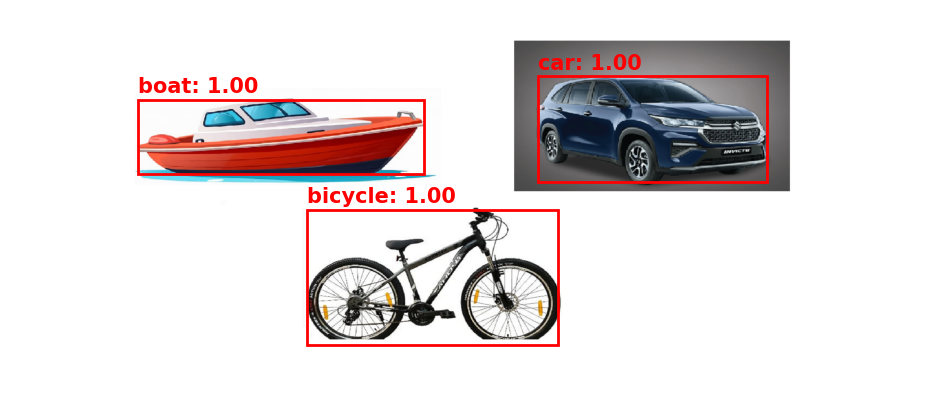

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define preprocessing for the input image
preprocess = transforms.Compose([
    transforms.ToTensor()  # Convert image to tensor
])

# COCO class labels
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'nothing', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'hat', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load and preprocess the image
image = Image.open("/content/Object.png")  # Replace with your image path
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    prediction = model(input_tensor)

# Create the plot using matplotlib
fig, ax = plt.subplots(1, figsize=(12, 12))

# Display the image
ax.imshow(image)

# Add bounding boxes, labels, and confidence scores
for i in range(len(prediction[0]['boxes'])):
    box = prediction[0]['boxes'][i].cpu().numpy()
    label = prediction[0]['labels'][i].item()  # Get the label index
    score = prediction[0]['scores'][i].item()  # Get the confidence score

    # If the score is above the threshold (e.g., 0.5), draw the box and label
    if score > 0.5:
        # Draw the bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Create the label text with confidence
        label_text = f"{COCO_CLASSES[label]}: {score:.2f}"

        # Add label text on top of the box
        ax.text(box[0], box[1] - 10, label_text, color='red', fontsize=15, weight='bold', verticalalignment='bottom')

# Hide axis
ax.axis('off')

# Show the image with bounding boxes and labels
plt.show()

# Print the number of objects detected with high confidence
print(f"Detected {sum(score > 0.5 for score in prediction[0]['scores']):d} objects with high confidence.")
